In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix 
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [2]:
company1 = pd.read_csv('Company_Data.csv')
company1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
company1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
company1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [5]:
company1.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [6]:
company1.US.value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [7]:
company1.Urban.value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

C:\Users\Anup0\AppData\Local\Temp\ipykernel_12460\750368503.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(company1.corr(),vmax = 1,vmin=-1,annot=True,cmap='PuBu')


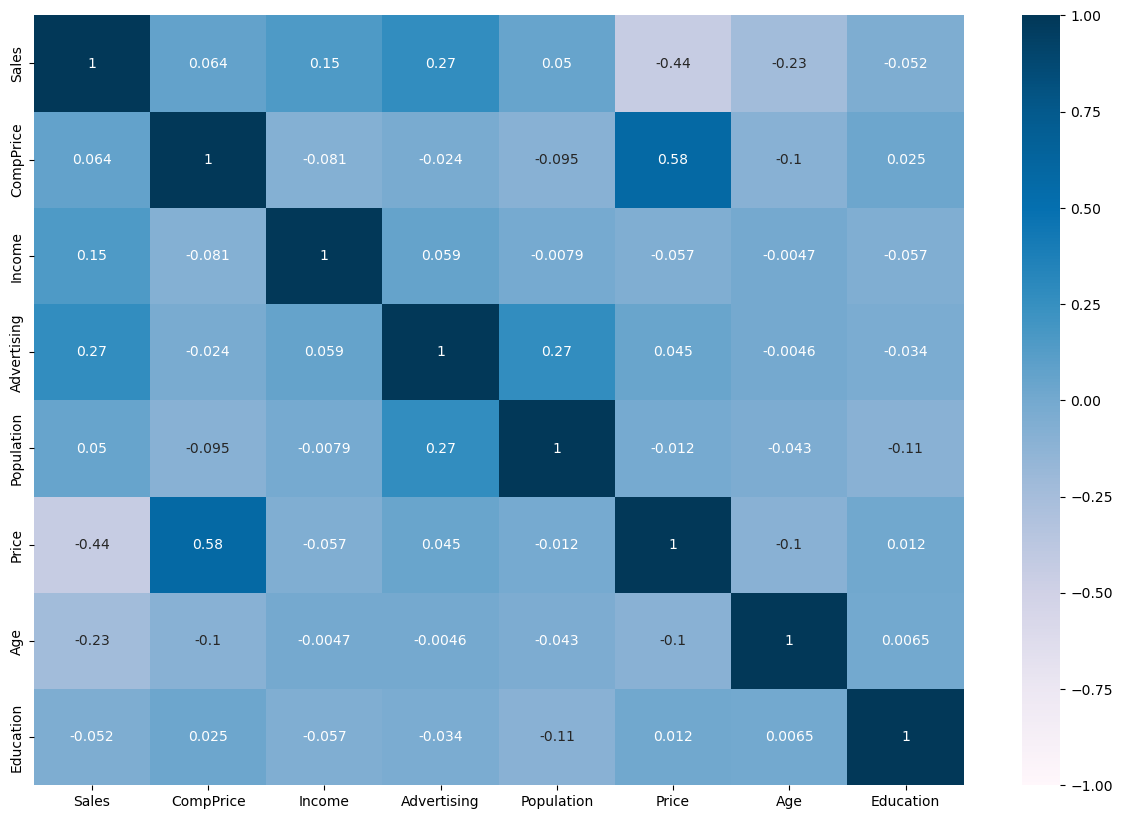

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(company1.corr(),vmax = 1,vmin=-1,annot=True,cmap='PuBu')
plt.show()

In [9]:
# Let's create new target variable Sale based on Sales and convert it into categorical:

company2 = company1.copy()

company2.insert(11,'Sale'," ")

for i in range(0,len(company2['Sales']),1):
    if company2['Sales'].iloc[i] <= 4:
        company2['Sale'].iloc[i] = 'Low'
    elif company2['Sales'].iloc[i] > 4 and company2['Sales'].iloc[i] <= 10:
        company2['Sale'].iloc[i] = 'Med'
    else:
        company2['Sale'].iloc[i] = 'High'
        
        
company2.drop('Sales',axis=1,inplace=True) #Dropping sales column
company2.head()

C:\Users\Anup0\AppData\Local\Temp\ipykernel_12460\95922085.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company2['Sale'].iloc[i] = 'Med'
C:\Users\Anup0\AppData\Local\Temp\ipykernel_12460\95922085.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company2['Sale'].iloc[i] = 'High'
C:\Users\Anup0\AppData\Local\Temp\ipykernel_12460\95922085.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company2['Sale'].iloc[i] = 'Low'


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Med
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Med
4,141,64,3,340,128,Bad,38,13,Yes,No,Med


In [10]:
LE = LabelEncoder()
company2['ShelveLoc']= LE.fit_transform(company2['ShelveLoc'])
company2['Urban']= LE.fit_transform(company2['Urban'])
company2['US']= LE.fit_transform(company2['US'])
company2['Sale']= LE.fit_transform(company2['Sale'])

In [11]:
company2['ShelveLoc']=company2['ShelveLoc'].astype('category')
company2['Urban']=company2['Urban'].astype('category')
company2['US']=company2['US'].astype('category')
company2['Sale']=company2['Sale'].astype('category')
company2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CompPrice    400 non-null    int64   
 1   Income       400 non-null    int64   
 2   Advertising  400 non-null    int64   
 3   Population   400 non-null    int64   
 4   Price        400 non-null    int64   
 5   ShelveLoc    400 non-null    category
 6   Age          400 non-null    int64   
 7   Education    400 non-null    int64   
 8   Urban        400 non-null    category
 9   US           400 non-null    category
 10  Sale         400 non-null    category
dtypes: category(4), int64(7)
memory usage: 24.1 KB


In [12]:
# Let's split df into features and target:
y = company2['Sale']
x = company2.drop('Sale',axis=1)

In [13]:
# Let's further split X & y into train and test:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42)

## Decision Tree Model - Entropy Criteria

In [14]:
for i in range(2,20,1):
    model = DecisionTreeClassifier(criterion = 'entropy',random_state=42,max_depth=i)
    model.fit(x_train,y_train)
    y_train_pred = model.predict(x_train)
    print('For Max Depth :',i,' , the accuracy score for train dataset is : ',round(accuracy_score(y_train,y_train_pred),3))
    y_test_pred = model.predict(x_test)
    print('For Max Depth :',i,' , the accuracy score for test dataset is : ',round(accuracy_score(y_test,y_test_pred),3))
    print('\n')

For Max Depth : 2  , the accuracy score for train dataset is :  0.714
For Max Depth : 2  , the accuracy score for test dataset is :  0.717


For Max Depth : 3  , the accuracy score for train dataset is :  0.761
For Max Depth : 3  , the accuracy score for test dataset is :  0.742


For Max Depth : 4  , the accuracy score for train dataset is :  0.786
For Max Depth : 4  , the accuracy score for test dataset is :  0.767


For Max Depth : 5  , the accuracy score for train dataset is :  0.843
For Max Depth : 5  , the accuracy score for test dataset is :  0.617


For Max Depth : 6  , the accuracy score for train dataset is :  0.886
For Max Depth : 6  , the accuracy score for test dataset is :  0.575


For Max Depth : 7  , the accuracy score for train dataset is :  0.936
For Max Depth : 7  , the accuracy score for test dataset is :  0.667


For Max Depth : 8  , the accuracy score for train dataset is :  0.982
For Max Depth : 8  , the accuracy score for test dataset is :  0.667


For Max Depth

In [15]:
model1 = DecisionTreeClassifier(criterion = 'entropy',random_state=42,max_depth=3)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [16]:
y_pred = model1.predict(x_train)
print(accuracy_score(y_train,y_pred))

0.7607142857142857


In [17]:
y_test_pred = model1.predict(x_test)
print(accuracy_score(y_test,y_test_pred))

0.7416666666666667


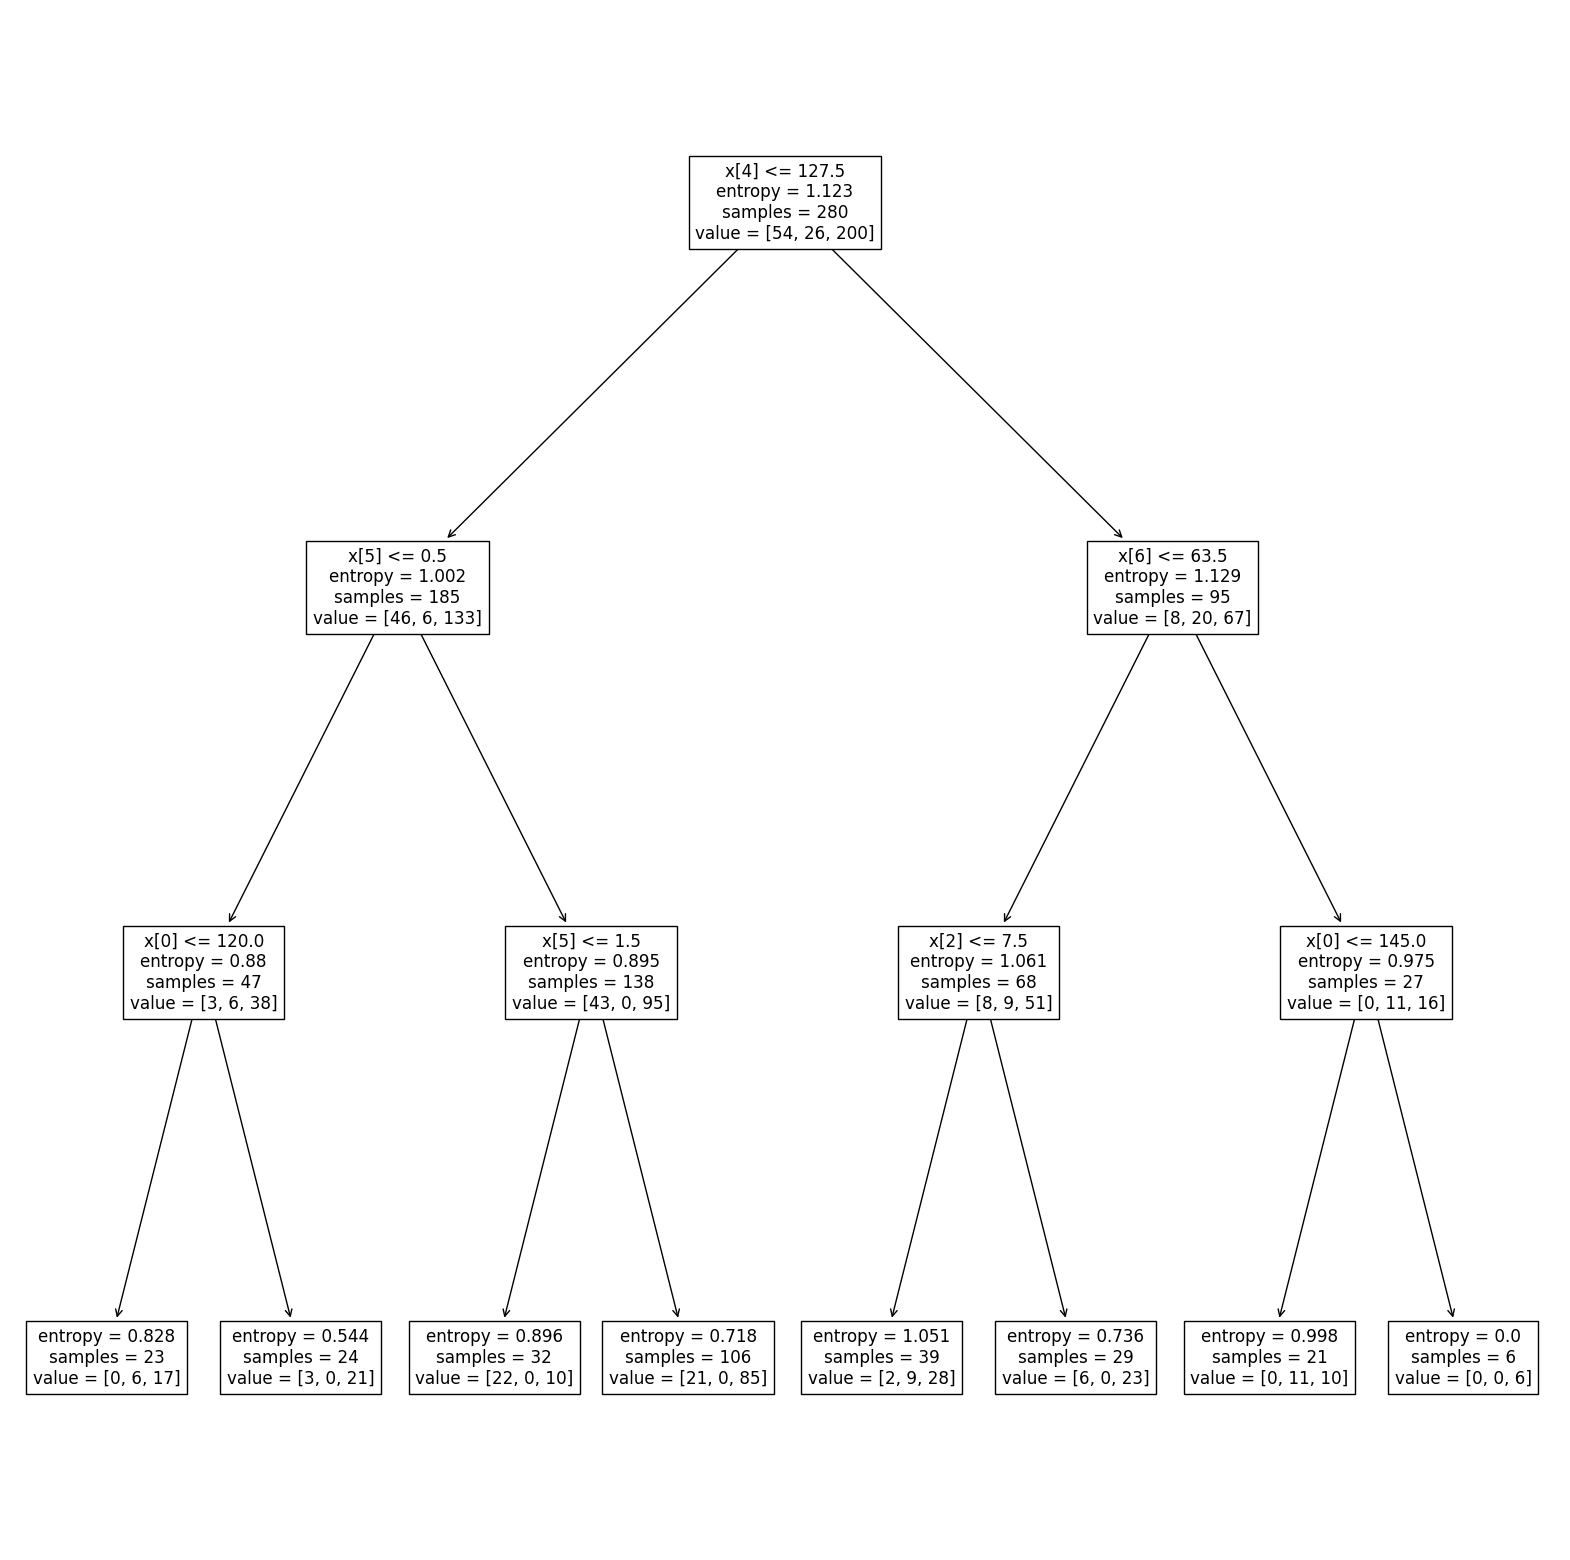

In [18]:
# Visualization of decision tree with max depth =3 :
plt.figure(figsize=(20,20))
plot_tree(model1)
plt.show()

In [19]:
classification_report(y_test,y_test_pred,output_dict=True)

{'0': {'precision': 0.7368421052631579,
  'recall': 0.5833333333333334,
  'f1-score': 0.6511627906976745,
  'support': 24},
 '1': {'precision': 0.125,
  'recall': 0.1,
  'f1-score': 0.11111111111111112,
  'support': 10},
 '2': {'precision': 0.7956989247311828,
  'recall': 0.8604651162790697,
  'f1-score': 0.8268156424581005,
  'support': 86},
 'accuracy': 0.7416666666666667,
 'macro avg': {'precision': 0.5525136766647801,
  'recall': 0.5145994832041344,
  'f1-score': 0.5296965147556287,
  'support': 120},
 'weighted avg': {'precision': 0.7280359837766459,
  'recall': 0.7416666666666667,
  'f1-score': 0.7320430278270995,
  'support': 120}}

In [20]:
confusion_matrix(y_test,y_test_pred)

array([[14,  0, 10],
       [ 0,  1,  9],
       [ 5,  7, 74]], dtype=int64)

### Improving Model Accuracy:

In [21]:
# Creating DF of feature names with features importance:
Imp_Features = pd.DataFrame(model1.feature_importances_,columns=["Important"],index=x.columns)
Imp_Feat = Imp_Features.sort_values(by = 'Important',ascending=False)
Imp_Feat

,Important
ShelveLoc,0.415632
Price,0.231488
CompPrice,0.155412
Advertising,0.103943
Age,0.093525
Income,0.000000
Population,0.000000
Education,0.000000
Urban,0.000000
US,0.000000


#### We can say that : CompPrice, ShelveLoc , Price  and Advertising are top attributes contributing to Sales.

In [22]:
# Let's remove Urban,Advertising,Education,CompPrice & US from dataset and try again for better accuracy:
y = company2['Sale']
x = company2.drop(['Sale','Urban','US','Education','Income','Population','Age'],axis=1)

# Let's further split X & y into train and test:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42)

In [23]:
model1_mod = DecisionTreeClassifier(criterion = 'entropy',random_state=42,max_depth=3)
model1_mod.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [24]:
y_pred = model1_mod.predict(x_train)
print(accuracy_score(y_train,y_pred))

0.7571428571428571


In [25]:
y_test_pred = model1_mod.predict(x_test)
print(accuracy_score(y_test,y_test_pred))

0.7916666666666666


## Decision Tree Model - Gini Criteria

In [26]:
for i in range(2,20,1):
    model_g = DecisionTreeClassifier(criterion = 'gini',random_state=42,max_depth=i)
    model_g.fit(x_train,y_train)
    y_train_pred = model_g.predict(x_train)
    print('For Max Depth :',i,' , the accuracy score for train dataset is : ',round(accuracy_score(y_train,y_train_pred),3))
    y_test_pred = model_g.predict(x_test)
    print('For Max Depth :',i,' , the accuracy score for test dataset is : ',round(accuracy_score(y_test,y_test_pred),3))
    print('\n')

For Max Depth : 2  , the accuracy score for train dataset is :  0.743
For Max Depth : 2  , the accuracy score for test dataset is :  0.65


For Max Depth : 3  , the accuracy score for train dataset is :  0.754
For Max Depth : 3  , the accuracy score for test dataset is :  0.683


For Max Depth : 4  , the accuracy score for train dataset is :  0.811
For Max Depth : 4  , the accuracy score for test dataset is :  0.658


For Max Depth : 5  , the accuracy score for train dataset is :  0.832
For Max Depth : 5  , the accuracy score for test dataset is :  0.725


For Max Depth : 6  , the accuracy score for train dataset is :  0.871
For Max Depth : 6  , the accuracy score for test dataset is :  0.7


For Max Depth : 7  , the accuracy score for train dataset is :  0.907
For Max Depth : 7  , the accuracy score for test dataset is :  0.7


For Max Depth : 8  , the accuracy score for train dataset is :  0.929
For Max Depth : 8  , the accuracy score for test dataset is :  0.733


For Max Depth : 9 

In [27]:
model2 = DecisionTreeClassifier(criterion = 'gini',random_state=42,max_depth=3)
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [28]:
y_pred = model2.predict(x_train)
print(accuracy_score(y_train,y_pred))

0.7535714285714286


In [29]:
y_test_pred = model2.predict(x_test)
print(accuracy_score(y_test,y_test_pred))

0.6833333333333333


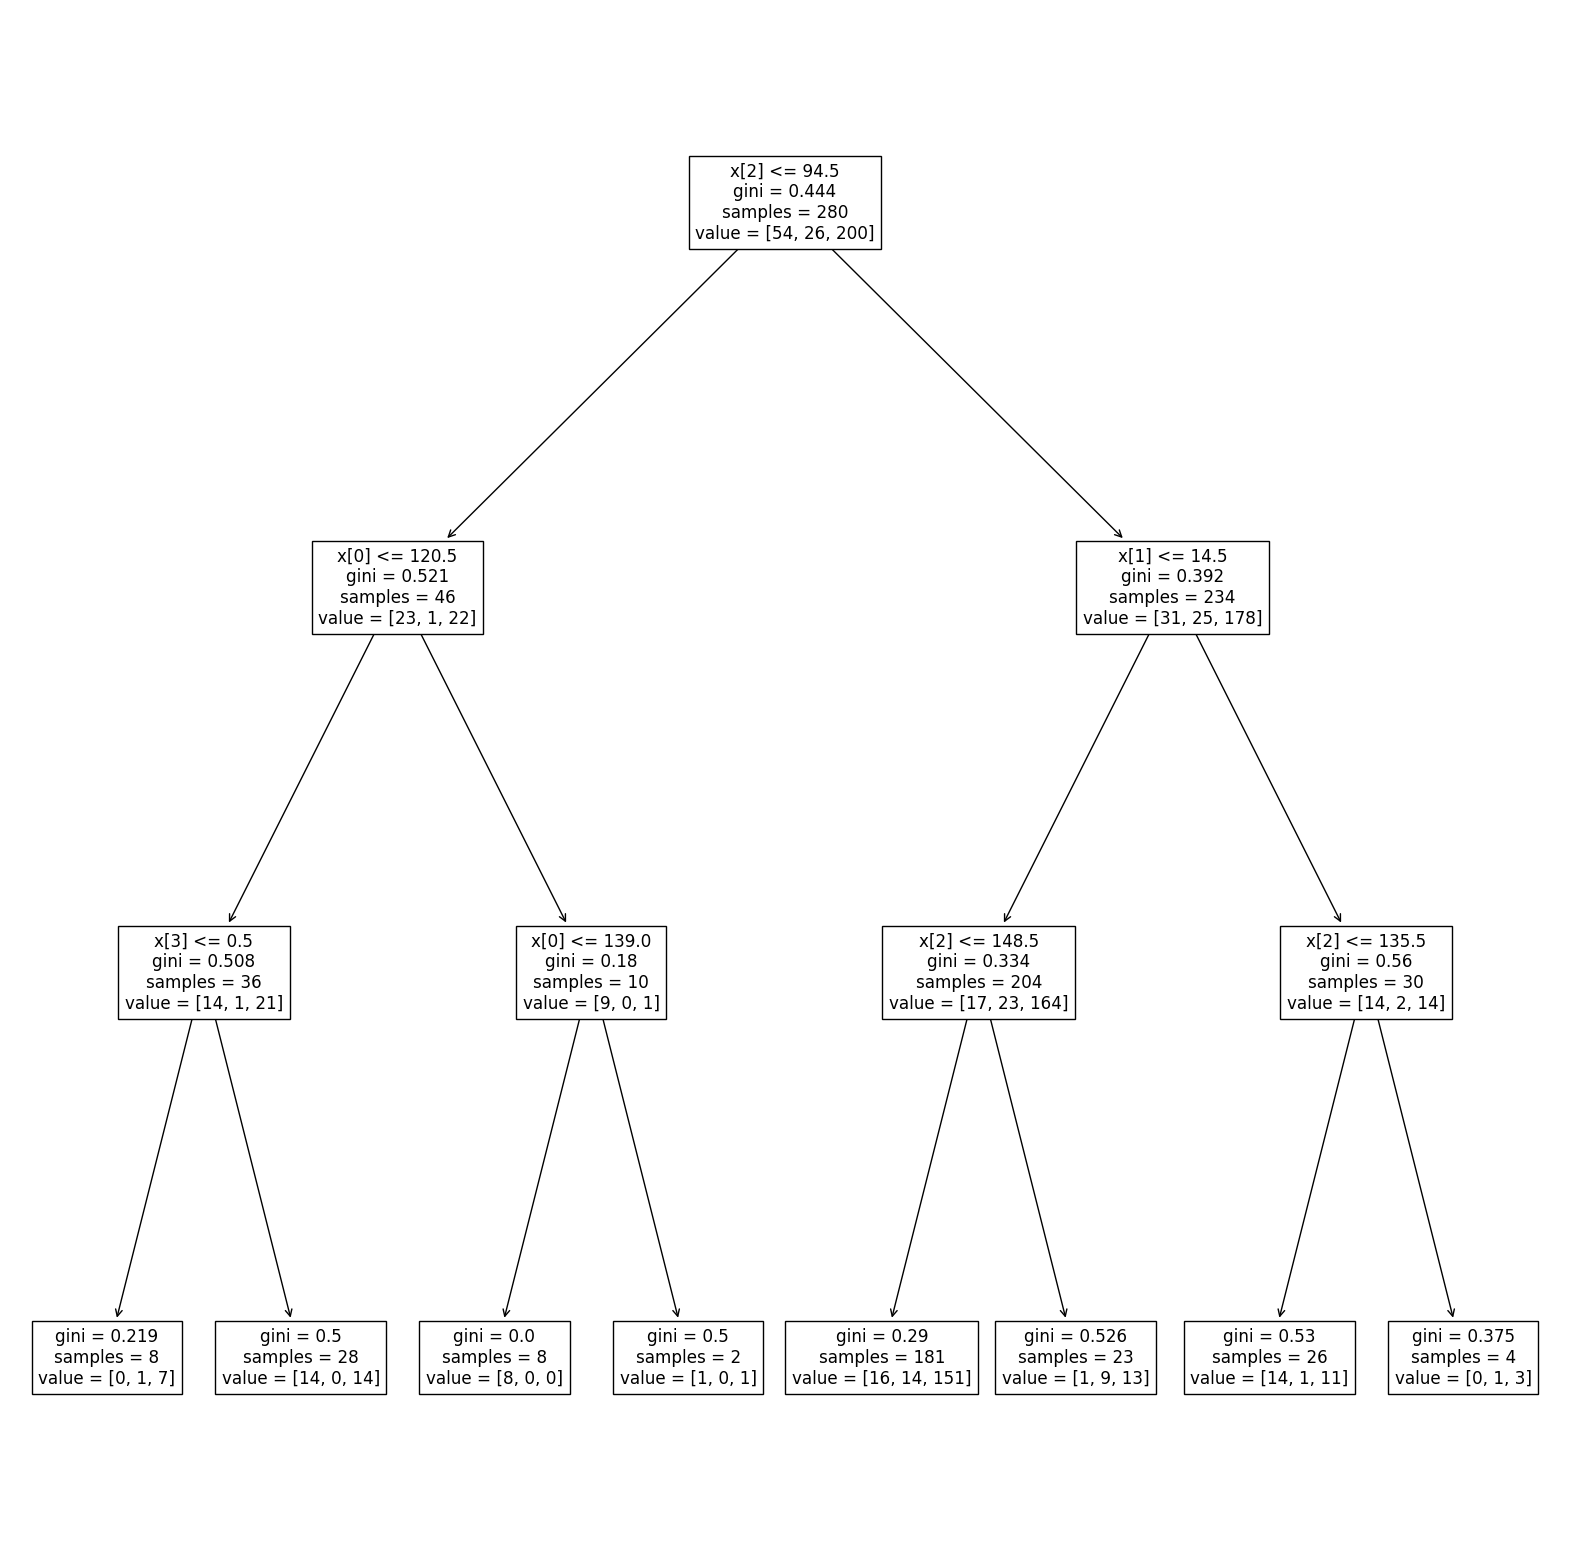

In [30]:
# Visualization:
plt.figure(figsize=(20,20))
plot_tree(model2)
plt.show()

In [31]:
classification_report(y_test,y_test_pred,output_dict=True)

C:\Users\Anup0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anup0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anup0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0': {'precision': 0.4411764705882353,
  'recall': 0.625,
  'f1-score': 0.5172413793103449,
  'support': 24},
 '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 10},
 '2': {'precision': 0.7790697674418605,
  'recall': 0.7790697674418605,
  'f1-score': 0.7790697674418605,
  'support': 86},
 'accuracy': 0.6833333333333333,
 'macro avg': {'precision': 0.4067487460100319,
  'recall': 0.4680232558139535,
  'f1-score': 0.4321037155840684,
  'support': 120},
 'weighted avg': {'precision': 0.6465686274509804,
  'recall': 0.6833333333333333,
  'f1-score': 0.6617816091954024,
  'support': 120}}

In [32]:
confusion_matrix(y_test,y_test_pred)

array([[15,  0,  9],
       [ 0,  0, 10],
       [19,  0, 67]], dtype=int64)